In [11]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [12]:
print("Predictors: ", cancer1.feature_names)
print("\nResponse: ", cancer1.target_names)


Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Response:  ['malignant' 'benign']


In [13]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')

#cancer.shape

# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target

# Take a look at the DataFrame again to double check we added the column properly
cancer.shape


(569, 31)

In [14]:
from sklearn.model_selection import train_test_split

# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:10]

# Select the response column 
y = cancer.Target

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [16]:

import statsmodels.api as sm
import statsmodels.tools as tools

# add constant to training data
x_train_const = tools.add_constant(x_train)
# Train the logistic regression with the training data
log_reg_3 = sm.Logit(y_train, x_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.131593
         Iterations 11


In [17]:
print(log_reg_3.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  426
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           10
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                  0.8004
Time:                        11:53:23   Log-Likelihood:                -56.059
converged:                       True   LL-Null:                       -280.92
Covariance Type:            nonrobust   LLR p-value:                 2.402e-90
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     17.1132     15.041      1.138      0.255     -12.368      46.594
mean_radius               -0.1786      4.151     -0.043      0.966      -8.315       7.958
mean

In [19]:
from sklearn.metrics import accuracy_score
# add constant to test data
x_test_const = tools.add_constant(x_test)
# Predict responses 
pred_3 = log_reg_3.predict(x_test_const)
prediction_3 = list(map(round, pred_3))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_3))


Test accuracy =  0.958041958041958


In [21]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, prediction_3) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[49  5]
 [ 1 88]]


c:\Users\westo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


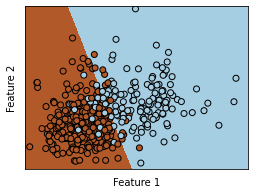

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train.iloc[:,:2], y_train)

# Create a mesh grid for our graph
x_min, x_max = x.iloc[:, 0].min() - .5, x.iloc[:, 0].max() + .5
y_min, y_max = x.iloc[:, 1].min() - .5, x.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the model to predict the class
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
